In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [2]:
data=pd.read_csv('adani_train.csv')
data

,Date,Symbol,Open,High,Low,Close,Volume
0,2010-01-04,ADANIENT,437.20,454.00,433.00,451.60,285126
1,2010-01-05,ADANIENT,453.00,463.95,453.00,462.05,349511
2,2010-01-06,ADANIENT,463.00,517.00,460.00,507.65,1122953
3,2010-01-07,ADANIENT,519.40,519.40,483.00,486.70,729468
4,2010-01-08,ADANIENT,489.80,508.00,482.20,492.85,509498
...,...,...,...,...,...,...,...
1490,2015-12-24,ADANIENT,82.50,84.90,81.60,84.25,3181312
1491,2015-12-28,ADANIENT,84.00,85.35,82.75,84.00,2132077
1492,2015-12-29,ADANIENT,84.25,84.75,83.10,83.80,2338544
1493,2015-12-30,ADANIENT,83.80,85.20,83.00,83.40,3088149


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1495 non-null   object 
 1   Symbol  1495 non-null   object 
 2   Open    1495 non-null   float64
 3   High    1495 non-null   float64
 4   Low     1495 non-null   float64
 5   Close   1495 non-null   float64
 6   Volume  1495 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 81.9+ KB


In [4]:
#Close datatype conversion(inside_dataset),invalid values will be deleted
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data=data.dropna()
trainData=data.iloc[:,4:5].values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1495 non-null   object 
 1   Symbol  1495 non-null   object 
 2   Open    1495 non-null   float64
 3   High    1495 non-null   float64
 4   Low     1495 non-null   float64
 5   Close   1495 non-null   float64
 6   Volume  1495 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 81.9+ KB


In [6]:
sc=MinMaxScaler(feature_range=(0,1))
trainData=sc.fit_transform(trainData)
trainData.shape

(1495, 1)

In [7]:
X_train=[]
y_train=[]

for i in range(60,1149):
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])
    
X_train,y_train=np.array(X_train),np.array(y_train)
    

In [8]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1089, 60, 1)

In [9]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")


In [10]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 40s - loss: 0.0263 - 40s/epoch - 1s/step
Epoch 2/20
35/35 - 7s - loss: 0.0055 - 7s/epoch - 213ms/step
Epoch 3/20
35/35 - 8s - loss: 0.0057 - 8s/epoch - 226ms/step
Epoch 4/20
35/35 - 8s - loss: 0.0058 - 8s/epoch - 225ms/step
Epoch 5/20
35/35 - 8s - loss: 0.0045 - 8s/epoch - 227ms/step
Epoch 6/20
35/35 - 8s - loss: 0.0041 - 8s/epoch - 218ms/step
Epoch 7/20
35/35 - 8s - loss: 0.0053 - 8s/epoch - 229ms/step
Epoch 8/20
35/35 - 7s - loss: 0.0036 - 7s/epoch - 203ms/step
Epoch 9/20
35/35 - 7s - loss: 0.0104 - 7s/epoch - 189ms/step
Epoch 10/20
35/35 - 8s - loss: 0.0037 - 8s/epoch - 217ms/step
Epoch 11/20
35/35 - 7s - loss: 0.0038 - 7s/epoch - 209ms/step
Epoch 12/20
35/35 - 7s - loss: 0.0032 - 7s/epoch - 211ms/step
Epoch 13/20
35/35 - 7s - loss: 0.0034 - 7s/epoch - 214ms/step
Epoch 14/20
35/35 - 7s - loss: 0.0027 - 7s/epoch - 211ms/step
Epoch 15/20
35/35 - 7s - loss: 0.0042 - 7s/epoch - 214ms/step
Epoch 16/20
35/35 - 7s - loss: 0.0030 - 7s/epoch - 208ms/step
Epoch 17/20
35/35 

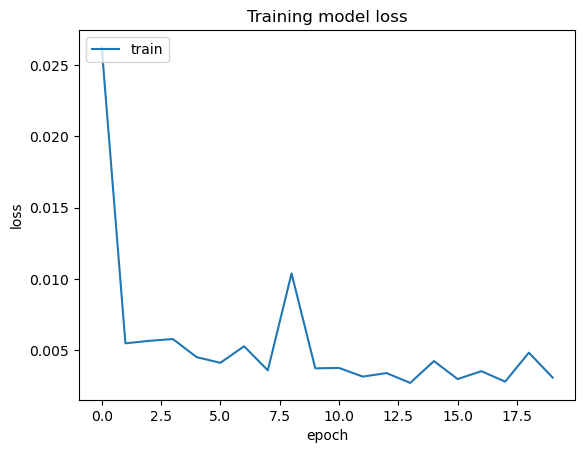

In [11]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [12]:
testData = pd.read_csv('adani_test.csv')
n=testData["Close"]
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData=testData.iloc[:,4:5] #Array Conversion of a column
y_test=testData.iloc[60:,0:].values

inputClosing=testData.iloc[:,0:].values
inputClosing_scaled=sc.transform(inputClosing)
inputClosing_scaled

array([[ 2.29437530e-02],
       [ 2.55857610e-02],
       [ 2.55162344e-02],
       [ 2.70458180e-02],
       [ 1.68949454e-02],
       [ 2.05798512e-02],
       [ 1.81464229e-02],
       [ 1.89807412e-02],
       [ 1.57825210e-02],
       [ 1.59911006e-02],
       [ 1.11937704e-02],
       [ 3.26774665e-03],
       [ 5.63164847e-03],
       [ 2.22484878e-03],
       [ 2.98964055e-03],
       [ 6.67454634e-03],
       [ 9.52513384e-03],
       [ 9.66418689e-03],
       [ 7.92602378e-03],
       [ 6.04880762e-03],
       [ 1.04985052e-02],
       [ 7.43933811e-03],
       [ 7.43933811e-03],
       [ 7.36981158e-03],
       [ 8.27365640e-03],
       [ 1.03594521e-02],
       [ 9.24702774e-03],
       [ 8.27365640e-03],
       [ 9.73371341e-04],
       [-6.04880762e-03],
       [-1.87721616e-03],
       [-4.44969756e-03],
       [-7.43933811e-03],
       [-6.39644024e-03],
       [-5.56212195e-03],
       [-5.70117500e-03],
       [-7.78697073e-03],
       [-8.69081555e-03],
       [-8.3

In [13]:

inputClosing_scaled.shape
X_test=[]
length=len(testData)
timestep=60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test=np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape
n
y_test[59]

array([73.1])

In [14]:
testData

,Low
0,82.35
1,84.25
2,84.20
3,85.30
4,78.00
...,...
981,207.60
982,205.60
983,207.10
984,208.00


In [15]:
y_pred=model.predict(X_test)


29/29 [==============================] - 4s 74ms/step


In [16]:
X_test

array([[[0.02294375],
        [0.02558576],
        [0.02551623],
        ...,
        [0.00305917],
        [0.00166864],
        [0.00298964]],

       [[0.02558576],
        [0.02551623],
        [0.02704582],
        ...,
        [0.00166864],
        [0.00298964],
        [0.00924703]],

       [[0.02551623],
        [0.02704582],
        [0.01689495],
        ...,
        [0.00298964],
        [0.00924703],
        [0.00966419]],

       ...,

       [[0.11311966],
        [0.10832232],
        [0.1038031 ],
        ...,
        [0.20378224],
        [0.1971077 ],
        [0.19432664]],

       [[0.10832232],
        [0.1038031 ],
        [0.10505458],
        ...,
        [0.1971077 ],
        [0.19432664],
        [0.19641243]],

       [[0.1038031 ],
        [0.10505458],
        [0.09970104],
        ...,
        [0.19432664],
        [0.19641243],
        [0.19766391]]])

In [17]:
len(y_test)
x = sc.transform(y_test)


In [18]:
predicted_price=sc.inverse_transform(y_pred)



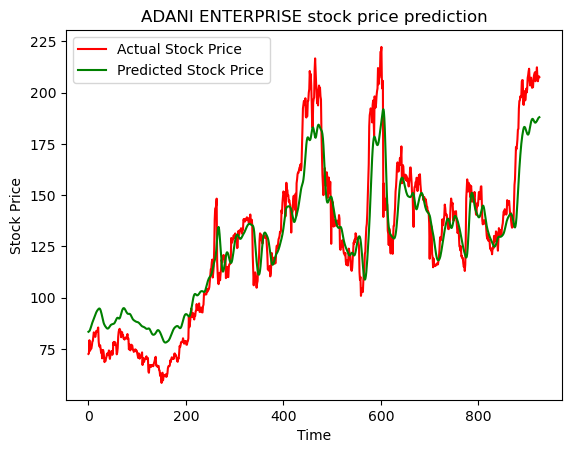

In [19]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('ADANI ENTERPRISE stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix


In [21]:
y_pred

array([[0.02427338],
       [0.02448982],
       [0.02480543],
       [0.02539258],
       [0.02625399],
       [0.02730189],
       [0.02842195],
       [0.02950527],
       [0.03049218],
       [0.03138708],
       [0.03221187],
       [0.03302272],
       [0.03388993],
       [0.03482529],
       [0.03578371],
       [0.03668007],
       [0.0374572 ],
       [0.03811578],
       [0.03866963],
       [0.03912509],
       [0.03950972],
       [0.03986567],
       [0.04008771],
       [0.04002737],
       [0.03959122],
       [0.03879344],
       [0.03768744],
       [0.03633883],
       [0.03487137],
       [0.03334581],
       [0.03187304],
       [0.03058976],
       [0.0295834 ],
       [0.0288428 ],
       [0.02827075],
       [0.02778575],
       [0.02733664],
       [0.02693012],
       [0.02661023],
       [0.02644463],
       [0.02647816],
       [0.02669779],
       [0.02706831],
       [0.02756939],
       [0.0281178 ],
       [0.02859616],
       [0.0289456 ],
       [0.029

In [22]:
y_test[59]

array([73.1])

In [56]:
cutoff=0.08
y_pred_classes = np.zeros_like(y_pred)
y_pred_classes[y_pred>cutoff]=1

In [57]:
sum(y_pred)/len(y_pred)

array([0.08553971], dtype=float32)

In [58]:
sum(y_test)/len(y_test)

array([127.88428726])

In [68]:
y_test_classes = sc.transform(y_test)
y_test_classes = np.zeros_like(y_test_classes)
y_test_classes[y_test > 120] = 1

In [69]:
sum(y_test_classes)/len(y_test_classes)

array([0.61555076])

In [70]:
#confusion_matrix(y_test_classes,y_pred_classes)

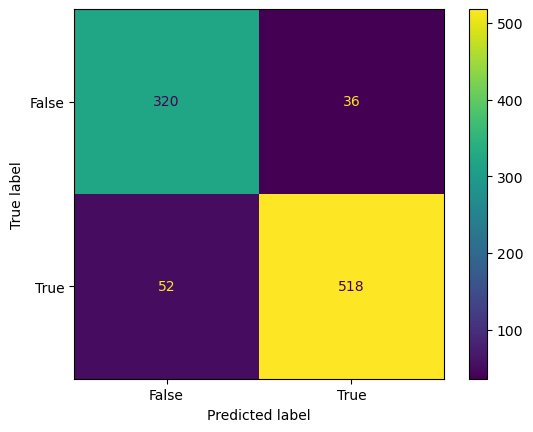

In [71]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test_classes,y_pred_classes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()


In [63]:
len(y_pred)

926

In [ ]:
cm_display

In [ ]:
confusion_matrix

In [ ]:
precision=confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
precision

In [ ]:
recall=confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])

In [ ]:
recall